# Quiz Content

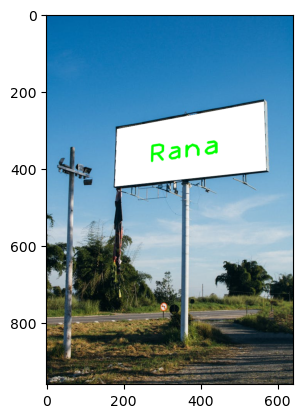

In [16]:
import cv2
from matplotlib import pyplot as plt 
import numpy as np

image = cv2.imread('./billboard.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
billboard_pts = [(184, 298),  # top left
                 (564, 227),  # top right
                 (178, 447),  # bottom left
                 (570, 405)]  # bootom right

input_pts = np.array(billboard_pts, dtype=np.float32)

width = (np.linalg.norm(input_pts[0]-input_pts[1]), np.linalg.norm(input_pts[2]-input_pts[3]))      
height = (np.linalg.norm(input_pts[0]-input_pts[2]), np.linalg.norm(input_pts[1]-input_pts[3]))  

width = int(np.max(width))
height = int(np.max(height))

# Define the output points
output_pts = np.array([(0, 0),
          (width-1, 0),
          (0, height-1),
          (width-1,height-1)], np.float32) 

H = cv2.getPerspectiveTransform(input_pts, output_pts)

cropped_img = cv2.warpPerspective(image, H, (width, height), flags=cv2.INTER_LINEAR)

white_img = cropped_img.copy()
for x in range(0,white_img.shape[0]):
    for y in range(0,white_img.shape[1]):
            white_img[x,y,:]=[255,255,255]

named_image = cv2.putText(white_img, "Rana", (100,120), 1, 5, (0, 255,0), 5, cv2.FILLED, bottomLeftOrigin=False)

height, width = image.shape[:2]

new_board = cv2.warpPerspective(named_image, np.linalg.inv(H), (width, height), flags=cv2.INTER_LINEAR)

final_image = new_board.copy()
for x in range(0,final_image.shape[0]):
    for y in range(0,final_image.shape[1]):
            if (final_image[x,y,:] == [0,0,0]).all():
                final_image[x,y,:]=image[x,y,:]

plt.imshow(final_image)

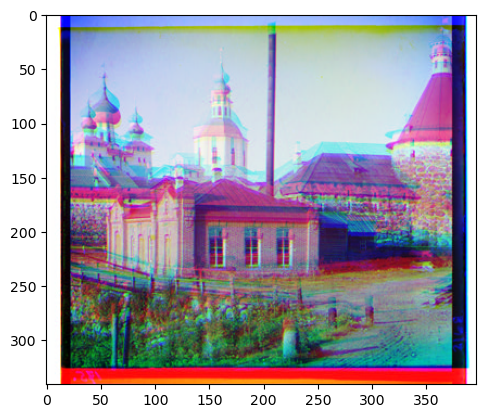

In [34]:
import cv2 as cv
from matplotlib import pyplot as plt 
import numpy as np

img = cv2.imread('00351v.jpg', cv.IMREAD_GRAYSCALE)

height, width = img.shape[:2]

h = int(height//3)

b = img[:h, :]
g = img[h:(2*h), :]
r = img[(2*h)+1:, :]

image = np.dstack((r, g, b))

plt.imshow(image)

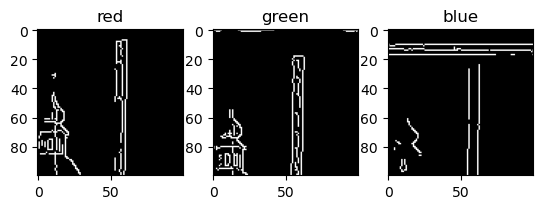

In [35]:
edgesr = cv.Canny(r, 150, 180)
edgesg = cv.Canny(g, 150, 180)
edgesb = cv.Canny(b, 150, 180)

plt.subplot(131)
plt.title('red')
plt.imshow(edgesr[0:100, 150:250], cmap = 'gray')

plt.subplot(132)
plt.title('green')
plt.imshow(edgesg[0:100, 150:250], cmap = 'gray')

plt.subplot(133)
plt.title('blue')
plt.imshow(edgesb[0:100, 150:250], cmap = 'gray')

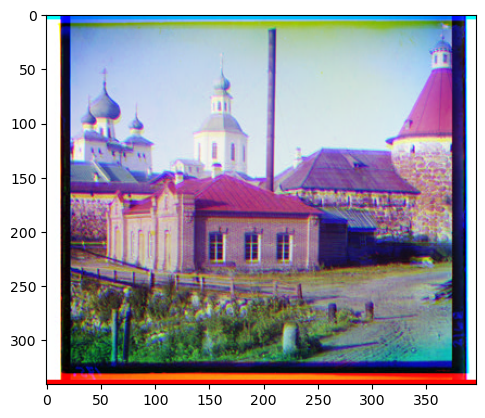

In [42]:
# shift red down
filter_b = np.zeros((10,1))
filter_b[9] = 1

filter_r = np.zeros((10,1))
filter_r[0] = 1

filter_g = np.zeros((10,1))
filter_g[9]=1

new_red = cv.filter2D(src=r, ddepth=-1, kernel=filter_r, borderType=cv.BORDER_CONSTANT) 
new_blue = cv.filter2D(src=b, ddepth=-1, kernel=filter_b, borderType=cv.BORDER_CONSTANT) 
new_green = cv.filter2D(src=g, ddepth=-1, kernel=filter_g, borderType=cv.BORDER_CONSTANT) 

new_image = np.dstack((new_red, new_green, new_blue))
plt.imshow(new_image)

# Transformations

- Using getAffineTransform and warpAffine

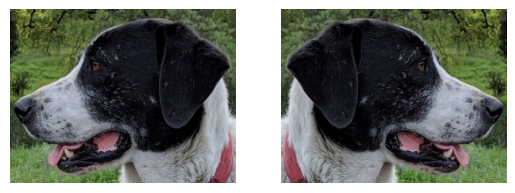

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_BGR = cv2.imread('data/images/dog-face.jpg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

h, w = img_RGB.shape[:2]

input = np.array([[0,0], [w-1, 0], [0, h-1]],dtype=np.float32)
output = np.array([[w-1, 0], [0,0], [w-1, h-1]], dtype=np.float32)

H = cv2.getAffineTransform(input, output)

new = cv2.warpAffine(img_RGB, H, (w,h))
plt.subplot(121), plt.imshow(img_RGB), plt.axis('off');
plt.subplot(122), plt.imshow(new), plt.axis('off');

- Using getPerspectiveTransform and warpPerspective

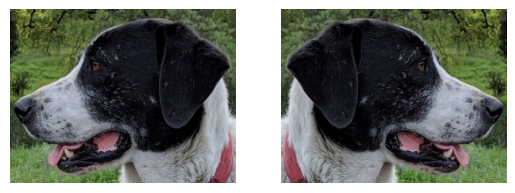

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_BGR = cv2.imread('data/images/dog-face.jpg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

h, w = img_RGB.shape[:2]

input = np.array([[0,0], [w-1, 0], [0, h-1], [w-1,h-1]],dtype=np.float32)
output = np.array([[w-1, 0], [0,0], [w-1, h-1], [0, h-1]], dtype=np.float32)

H = cv2.getPerspectiveTransform(input, output)

new_image = cv2.warpPerspective(img_RGB, H, (w,h))
plt.subplot(121), plt.imshow(img_RGB), plt.axis('off');
plt.subplot(122), plt.imshow(new), plt.axis('off');

- Using findHomography and warpPerspective

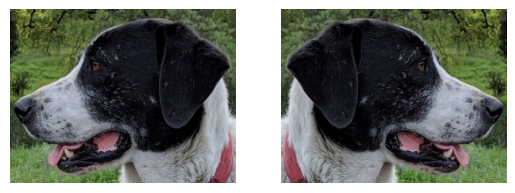

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

img_BGR = cv2.imread('data/images/dog-face.jpg')
img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)

h, w = img_RGB.shape[:2]

input = np.array([[0,0], [w-1, 0], [0, h-1], [w-1,h-1]],dtype=np.float32)
output = np.array([[w-1, 0], [0,0], [w-1, h-1], [0, h-1]], dtype=np.float32)

H, _ = cv2.findHomography(input, output, cv2.RANSAC, ransacReprojThreshold = 5)

new_image = cv2.warpPerspective(img_RGB, H, (w,h))
plt.subplot(121), plt.imshow(img_RGB), plt.axis('off');
plt.subplot(122), plt.imshow(new), plt.axis('off');

# Pretrained Models

In [2]:
from torchvision.io import read_image
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch import optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import models

In [3]:
alexnet = models.alexnet(weights=models.AlexNet_Weights.DEFAULT)
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [4]:
# lol laptop crashed here
weights = models.AlexNet_Weights.DEFAULT
preprocess = weights.transforms()
img = torch.tensor(cv2.imread('data/images/butterfly.jpg'))
batch = preprocess(img).unsqueeze(0)
prediction = alexnet(batch).squeeze(0).softmax(0)
class_id = prediction.argmax().item()                       
score = prediction[class_id].item()                         
category_name = weights.meta["categories"][class_id]

# Segmentation

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
from torchvision import models, transforms
from torchvision.io import read_image

# Define the model name
model_name = 'fcn_resnet50'

# Load the model with specified weights
model = models.get_model(model_name, weights="DEFAULT")
model_weight = models.get_model_weights(model_name).DEFAULT

# Set the model to evaluation mode
model = model.eval()

# Get the preprocessor for the model weights
preprocessor = model_weight.transforms()

(<Axes: >, <matplotlib.image.AxesImage at 0x147c6e76f50>)

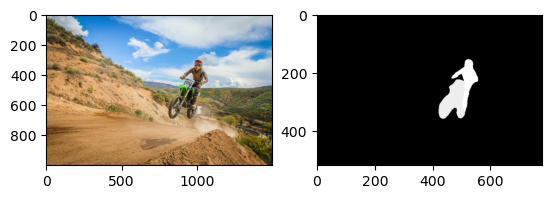

In [8]:
input_image_path = "data/images/motorbike.jpeg"

img = read_image(input_image_path)

batch = preprocessor(img).unsqueeze(0)
output = model(batch)['out'][0]
prediction = output.argmax(0)

plt.subplot(121), plt.imshow(transforms.ToPILImage()(img))
plt.subplot(122), plt.imshow(prediction, cmap = 'gray')

# Object Detection

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import torch
from torchvision import models, transforms
from torchvision.io import read_image

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)
img = cv2.cvtColor(cv2.imread('data/images/motorbike.jpeg'), cv2.COLOR_BGR2RGB)
result = model(img)

Using cache found in C:\Users\ronyf/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2024-5-18 Python-3.11.5 torch-2.2.2 CUDA:0 (NVIDIA GeForce GTX 1650 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


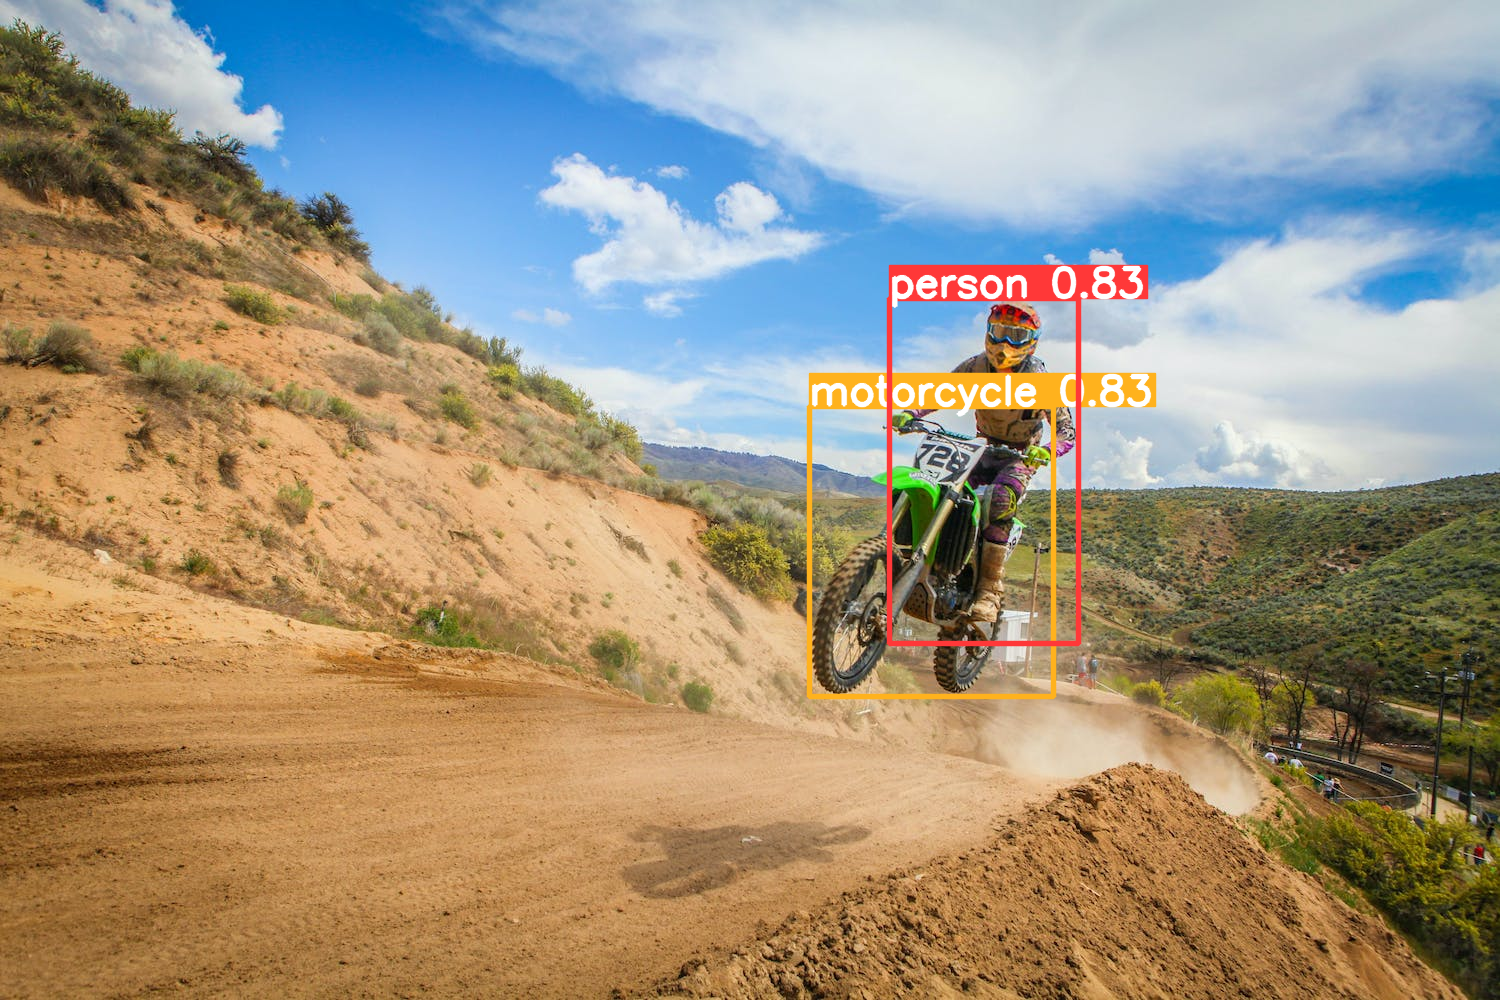

In [20]:
result.show()

In [28]:
import pandas as pd

# Initialize an empty list to store results
df = pd.concat(result.pandas().xyxy, ignore_index=True)
df

xmin        ymin         xmax        ymax  confidence  class  \
0  889.194458  298.906921  1078.213257  643.448975    0.834319      0   
1  809.434204  406.804260  1053.159668  696.309204    0.825390      3   

         name  
0      person  
1  motorcycle